In [224]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

This dataframe contains 1 year of price data from Apple Inc. (AAPL). The columns are as follows:
- Date: The date of the price data
- Open: The opening price of the stock
- High: The highest price of the stock
- Low: The lowest price of the stock
- Close: The closing price of the stock
- Dividends: The dividend amount
- Stock Splits: The stock split amount

I'll start by loading the dataset and examining its structure. Then, I'll calculate some basic
statistics and visualize the data so we can gain valuable insight e.g. finding a trend, seasonality, relative volatility, etc.

In [225]:
# First step to analyzing any type of dataset is to understand its structure.
df = pd.read_csv('charting/aapl_stock_prices.csv', delimiter=',')
print(df.columns)
df.describe()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.0
mean,215.688284,217.913309,213.751361,215.982688,5.583571e+07,0.004000,0.0
std,25.199897,25.418167,24.877284,25.295311,3.073289e+07,0.031432,0.0
min,164.572897,165.617978,163.308889,164.224564,2.323470e+07,0.000000,0.0
25%,194.184854,196.250415,193.108484,194.174889,4.047068e+07,0.000000,0.0
50%,224.369714,226.321889,222.508767,224.241394,4.849460e+07,0.000000,0.0
75%,232.527215,234.362832,229.482695,232.820576,6.041002e+07,0.000000,0.0
max,257.906429,259.814335,257.347047,258.735504,3.186799e+08,0.250000,0.0


In [226]:
# Let's take a look at the Volume.
v = df.Volume.describe().round(2)
print(v)
# You can round with f'{v:.2f}' as well.

count    2.500000e+02
mean     5.583571e+07
std      3.073289e+07
min      2.323470e+07
25%      4.047068e+07
50%      4.849460e+07
75%      6.041002e+07
max      3.186799e+08
Name: Volume, dtype: float64


In [227]:
# Average closing price over a 1 year period.
print(df.Close.mean())

215.9826881713867


Now we'll look at the number of up days versus down days.

In [228]:
df['price_action'] = np.where(df['Close'] > df['Open'], 'Up Days', 'Down Days : ( ')

In [229]:
print(df['price_action'].value_counts())

price_action
Up Days           141
Down Days : (     109
Name: count, dtype: int64


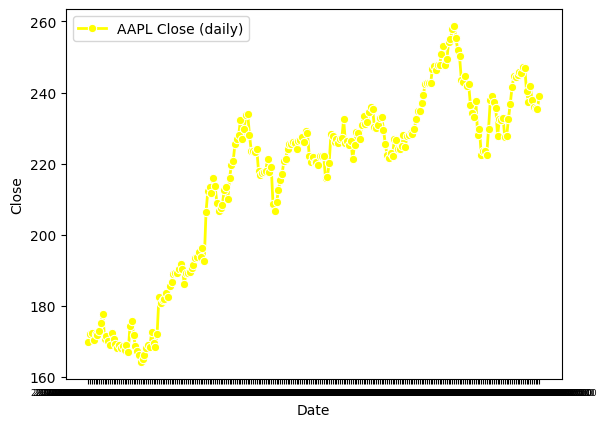

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'price_action'],
      dtype='object')


In [230]:
chart_data = df[['Date', 'Close']]
sns.lineplot(data=chart_data, x='Date', y='Close', color='yellow', label='AAPL Close (daily)', linewidth=2, marker='o')

# Adjusting the x-axis text size
plt.xticks(fontsize=6)
plt.show()
print(df.columns)

Finally, I'll split the data into training and testing sets, scale the features, and train a linear regression model to predict the closing price of the stock.
We're using sk-learn for this task. The model will be evaluated using the mean squared error and R^2 score.

Mean Squared Error: 0.0
R^2 Score: 1.0


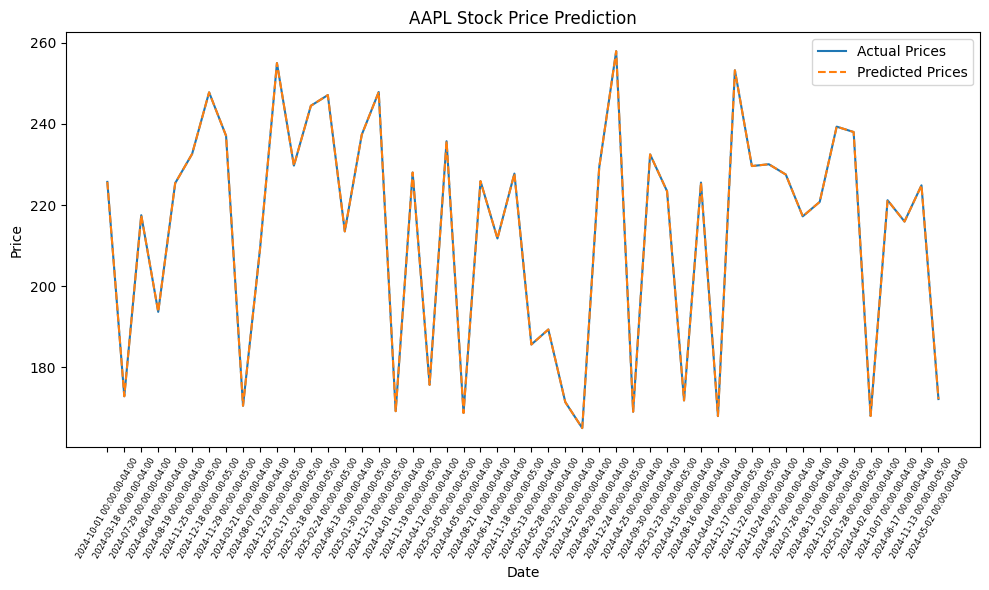

In [231]:
df.set_index('Date', inplace=True)
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df['Close']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

test_dates = df.loc[X_test.index].index

plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test.values, label='Actual Prices')
plt.plot(test_dates, y_pred, label='Predicted Prices', linestyle='--')
plt.xticks(rotation=60, fontsize=6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.tight_layout()
plt.show()